<a href="https://colab.research.google.com/github/ecSanders/Practice/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup data dir
import zipfile
import json
!kaggle datasets download -d kartik2112/fraud-detection
!touch ~/.kaggle/kaggle.json
# use your credential
api_token = {"username":"ecsanders","key":"5d2e9563e69eca60ce26304ebed7bf7b"}


with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

with zipfile.ZipFile('fraud-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('')

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
100% 201M/202M [00:01<00:00, 157MB/s]
100% 202M/202M [00:01<00:00, 136MB/s]


In [2]:
# Manipulation and visualizations
import pandas as pd
import numpy as np
import seaborn as sns

# Sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [3]:
X = pd.read_csv('fraudTrain.csv')
y = pd.read_csv('fraudTest.csv')

In [4]:
X.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
X.gender = pd.get_dummies(X.gender, drop_first=True).rename(columns={'M':'gender'})
y.gender = pd.get_dummies(y.gender, drop_first=True).rename(columns={'M':'gender'})

In [ ]:
# 0:F, 1:M
X.gender.value_counts()

0    709863
1    586812
Name: gender, dtype: int64

In [ ]:
# More females
X.gender.value_counts()[0] / sum(X.gender.value_counts())

0.5474486667823472

In [ ]:
# Less males
X.gender.value_counts()[1] / sum(X.gender.value_counts())

0.45255133321765284

In [ ]:
# Less femal fraud
(X[(X.gender == 0) & (X.is_fraud == 1)].gender.count() / X.gender.value_counts()[1]) * 100

0.6364900513281937

In [ ]:
# More male frauds
(X[(X.gender == 1) & (X.is_fraud == 1)].gender.count() / X.gender.value_counts()[1]) * 100

0.6426248951964172

In [ ]:
# 0.5% of the data set is fraudlent
# this means we will have high accuracy, use different metrics to eval
(X.is_fraud.value_counts()[1] / X.is_fraud.value_counts()[0]) * 100

0.5822355331224999

In [ ]:
# cc_len is not corr to fraud
# X['cc_len'] = X.cc_num.apply(lambda x: len(str(x)))

In [ ]:
sX = X.sample(n=100000)

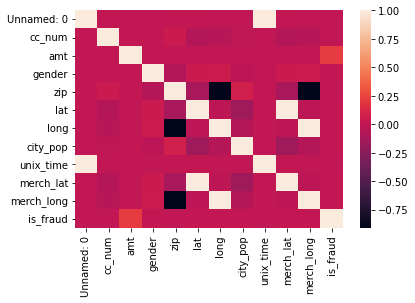

In [ ]:
# Amount is highly correlated to fraud
sns.heatmap(X.corr())

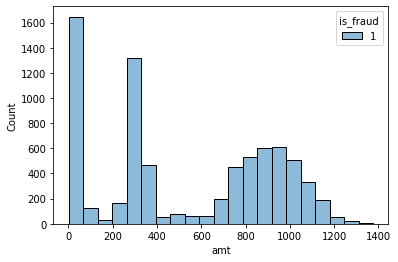

In [ ]:
# Fraud activity occurs within these distributions
sns.histplot(data=X[X.is_fraud == 1], x='amt', hue='is_fraud')

In [ ]:
# Fraud activity occurs mainly btw the 75% and max
X.amt.describe() - X[X.is_fraud == 1].amt.describe()

count    1.289169e+06
mean    -4.609691e+02
std     -2.302440e+02
min     -6.000000e-02
25%     -2.360125e+02
50%     -3.489850e+02
75%     -8.177350e+02
max      2.757286e+04
Name: amt, dtype: float64

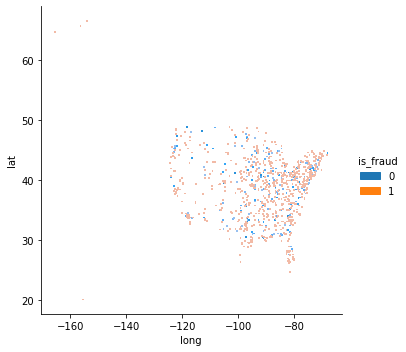

In [ ]:
# Where are they happening in the US?
# Looks proportionate to number of transactions
sns.displot(data=X, x='long', y='lat', hue='is_fraud')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  uint8  
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
X.trans_date_trans_time = pd.to_datetime(X.trans_date_trans_time, infer_datetime_format=True) 

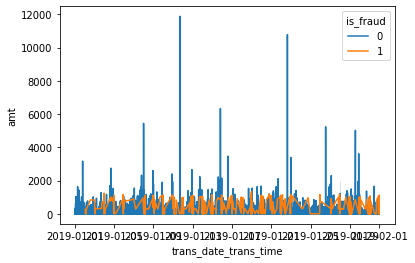

In [ ]:
sns.lineplot(data=X[X.trans_date_trans_time < "2019-02-01 00:00:00"], x='trans_date_trans_time', y='amt', hue='is_fraud')

In [ ]:
X.job.value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

## Clean the data

In [5]:
# Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler

In [7]:
X = pd.read_csv('fraudTrain.csv')
y = pd.read_csv('fraudTest.csv')

In [8]:
X.gender = pd.get_dummies(X.gender, drop_first=True).rename(columns={'M':'gender'})
y.gender = pd.get_dummies(y.gender, drop_first=True).rename(columns={'M':'gender'})

In [9]:
drop = ['Unnamed: 0','cc_num','merchant', 'category','first', 'last','street', 'city', 'state', 'zip','job', 'dob', 'trans_num', 'unix_time','trans_date_trans_time']
X.drop(columns=drop, inplace=True)
y.drop(columns=drop, inplace=True)

In [10]:
df = pd.concat([X,y])
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
mms = MinMaxScaler().fit(X)
X = mms.transform(X)

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, train_size=.8)

In [ ]:
# define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y_train))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.11)
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

Counter({0: 1842743, 1: 9651})
Counter({0: 1842743, 1: 184274})
Counter({0: 368548, 1: 184274})


In [ ]:
xgb = XGBClassifier(scale_pos_weight=100)
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

In [ ]:
xgb = RandomForestClassifier()
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

In [ ]:
xgb = LGBMClassifier(boosting_type='goss',scale_pos_weight=100)
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()